# Test Algorithms

Main file where I am testing various algorithms on different test images. Nothing here
is finalized. Continual changes are made here.

In [1]:
import sys
sys.path.insert(0, "../ellipsefinder/")

from find_ellipses import *
import matplotlib.pyplot as plt
import time

# Image `a90l90-001.tif`  
## Basic Algorithm

In [4]:
filename = "../images/a90l90-001/a90l90-001.tif"

def filter_res(res: pd.DataFrame, reset_index=True):
    # cond = res["eccentricity"] < 0.3

    # Minimum diameter
    cond = res["x diameter"] >= 15
    cond &= res["y diameter"] >= 15

    # Maximum diameter
    cond &= res["x diameter"] <= 200
    cond &= res["y diameter"] <= 200

    res = res.query("@cond")
    return res.reset_index(drop=True) if reset_index else res

start = time.time()

# Load image
original = cv2.imread(filename)

# Remove banner
no_banner, loc = remove_banner(original)
save_image(filename, no_banner, "_nobanner")

pre, img, res = Basic(
    no_banner,
    -80,
    invert=False,
    sort="y",
    filter=filter_res,
    # region=(None, 686),
    # show_contours=True,
    # _no_pre = True,
).run()

save_image(filename, pre, "_pre")
save_image(filename, img)
calculate_parameters(filename, res)
save_result(filename, res)

print(f"Time elapsed: {time.time() - start:.2f} seconds")

Time elapsed: 0.64 seconds


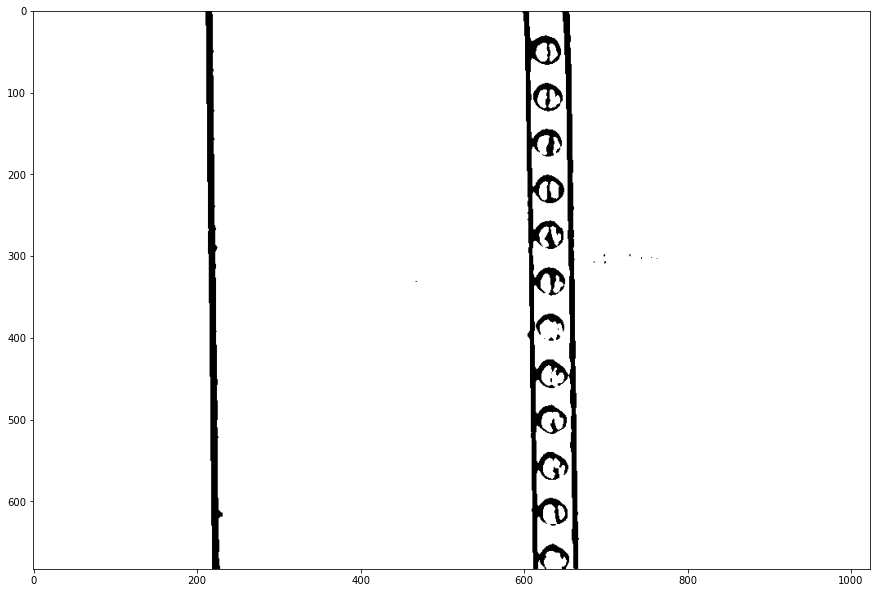

In [5]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(pre, cmap="gray")

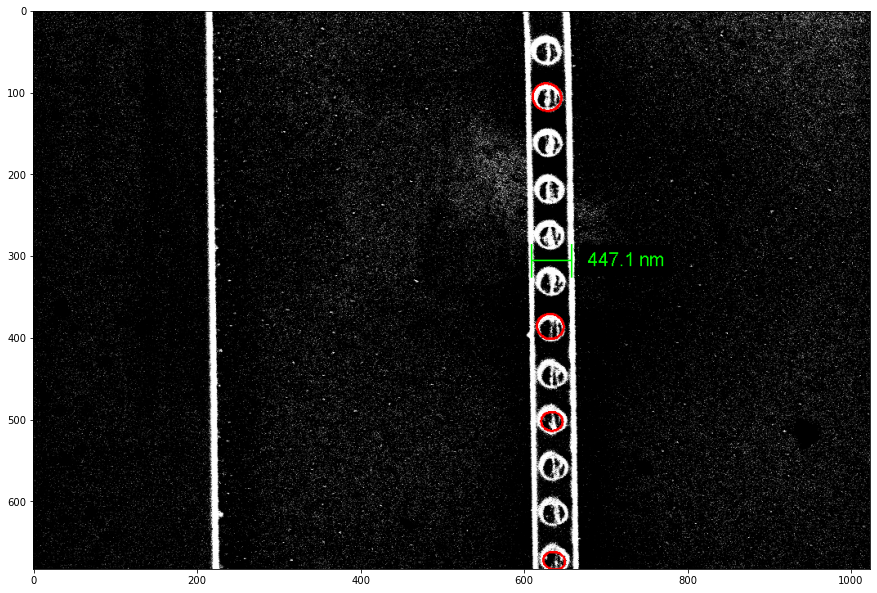

In [6]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(img)

## AAMED Algorithm

In [2]:
filename = "../images/a90l90-001/a90l90-001.tif"

def filter_res(res: pd.DataFrame, reset_index=True):
    cond = res["eccentricity"] < 0.25

    # Minimum diameter
    cond &= res["x diameter"] >= 15
    cond &= res["y diameter"] >= 15

    # Maximum diameter
    cond &= res["x diameter"] <= 200
    cond &= res["y diameter"] <= 200

    res = res.query("@cond")
    return res.reset_index(drop=True) if reset_index else res

start = time.time()

# Load image
original = cv2.imread(filename)

# Remove banner
no_banner, loc = remove_banner(original)
save_image(filename, no_banner, "_nobanner")

pre, img, res = AAMED(
    no_banner,
    800,
    1200,
    sort="y",
    filter=filter_res,
    # _no_pre = True,
).run()

save_image(filename, pre, "_pre")
save_image(filename, img)
calculate_parameters(filename, res)
save_result(filename, res)

print(f"Time elapsed: {time.time() - start:.2f} seconds")

Time elapsed: 0.74 seconds


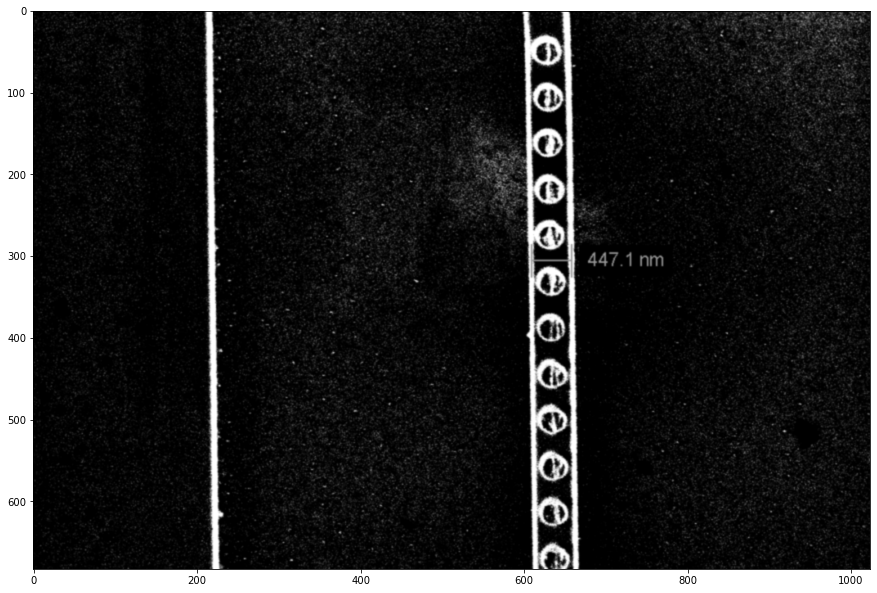

In [6]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(pre, cmap="gray")

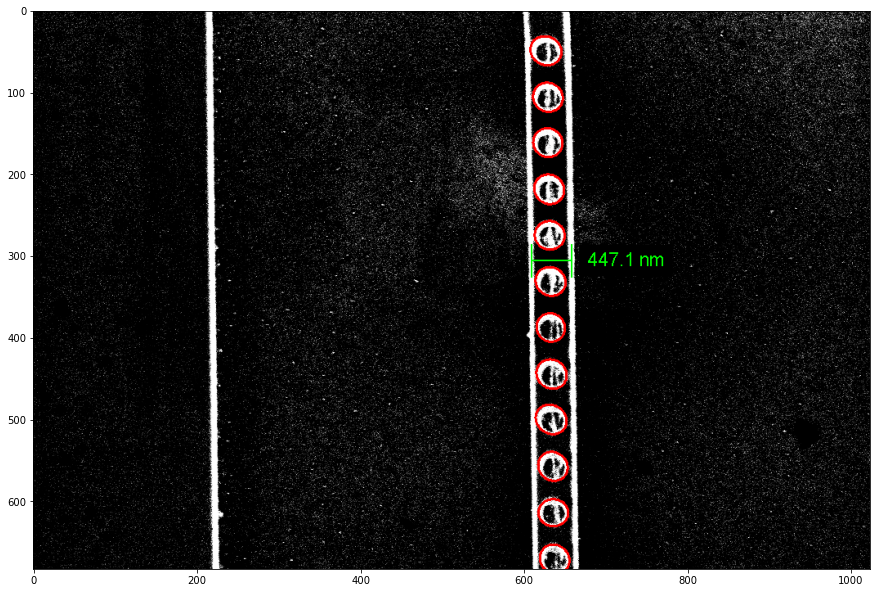

In [7]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(img)

In [8]:
print(get_pixel_size(filename), "nm/px")
res

9.125 nm/px


x center    y center  x diameter  y diameter      angle   P score  \
0   627.128906   49.282238   34.613773   38.866310  65.426796  0.815616   
1   629.514221  106.129066   34.937576   37.081776  56.181816  0.955098   
2   629.415894  161.610947   34.831116   36.315670  57.983364  0.939816   
3   631.145386  218.565521   35.158020   37.748528  47.766430  0.951767   
4   631.675903  274.806458   34.847134   36.664986  79.027786  0.902163   
5   632.713196  331.182739   34.628792   37.303810  60.208271  0.957683   
6   632.910278  387.465057   33.976387   35.495682  45.387486  0.921262   
7   633.931091  444.388885   34.696430   38.092190  55.398109  0.921963   
8   633.409058  499.732758   34.444496   39.257481  57.277214  0.826633   
9   635.593445  557.098816   34.180283   37.439880  51.677666  0.880261   
10  636.078735  613.737793   32.994789   36.359207  89.465630  0.848735   
11  637.728760  670.501831   34.095795   37.614216  48.606464  0.915265   

    eccentricity  x diameter (nm)  y diameter (nm)  perimeter (nm)  \
0       0.227408       315.850677       354.655090     1054.109985   
1       0.167559       318.805389       338.371216     1032.519653   
2       0.141498       317.833923       331.380493     1019.894775   
3       0.182031       320.816925       344.455322     1045.337036   
4       0.155485       317.980103       334.567993     1025.185791   
5       0.185927       315.987732       340.397278     1031.403687   
6       0.144717       310.034546       323.898102      995.897949   
7       0.206364       316.604919       347.591217     1043.884644   
8       0.239880       314.306030       358.224518     1057.535034   
9       0.204049       311.895081       341.638916     1027.100586   
10      0.210061       301.077454       331.777771      994.671692   
11      0.211145       311.124115       343.229706     1028.475464   

     area (nm^2)  distance (nm)  
0   87978.773438            NaN  
1   84724.492188     519.183777  
2   82721.250000     506.272949  
3   86792.070312     519.950073  
4   83555.343750     513.221375  
5   84478.500000     514.520630  
6   78869.367188     513.579285  
7   86432.359375     519.513428  
8   88429.656250     505.035278  
9   83688.500000     523.844604  
10  78454.054688     516.849609  
11  83870.343750     518.190613

## EM Algorithm

In [9]:
filename = "../images/a90l90-001/a90l90-001.tif"

def filter_res(res: pd.DataFrame, reset_index=True):
    cond = res["eccentricity"] < 0.25

    # Minimum diameter
    cond &= res["x diameter"] >= 15
    cond &= res["y diameter"] >= 15

    # Maximum diameter
    cond &= res["x diameter"] <= 200
    cond &= res["y diameter"] <= 200

    res = res.query("@cond")
    return res.reset_index(drop=True) if reset_index else res

start = time.time()

# Load image
original = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# Remove banner
no_banner, loc = remove_banner(original)
save_image(filename, no_banner, "_nobanner")

model = EM(
    no_banner,
    n=3,
    invert=False,
    sort="y",
    filter=filter_res,
    show_contours=True,
)
model.train(no_banner)
pre, img, res = model.run()

save_image(filename, pre, "_pre")
save_image(filename, img)
calculate_parameters(filename, res)
save_result(filename, res)

print(f"Time elapsed: {time.time() - start:.2f} seconds")
print(get_pixel_size(filename), "nm/px")
res

Time elapsed: 17.39 seconds
9.125 nm/px


x center    y center  x diameter  y diameter      angle  eccentricity  \
0   1006.722046   27.040308   15.514740   16.961239 -88.634201      0.202047   
1    730.912476   28.031469   18.533920   18.878304  -0.000000      0.095068   
2    810.189270   38.272572   19.361643   22.355848 -77.016510      0.249965   
3    630.051575   80.193039   44.160488   46.513142  73.416512      0.157005   
4    447.457001  120.967354   16.901176   17.834318 -84.660225      0.159615   
5    633.021545  188.704086   46.993614   51.454060  -3.936631      0.203630   
6    634.194641  245.740997   44.487808   45.588520  60.006226      0.109209   
7    437.284271  319.620819   16.695400   18.398481 -75.209007      0.210098   
8    638.318726  473.715271   42.400040   46.577244  53.800568      0.206956   
9    367.238525  485.929382   25.178308   26.680010 -21.258947      0.165381   
10   638.918640  531.436035   44.154087   49.644875  24.273102      0.228566   
11   639.474365  588.698486   43.108826   47.300423  30.262329      0.205779   
12   640.964172  642.582581   44.276886   49.883888  34.312744      0.230309   

    x diameter (nm)  y diameter (nm)  perimeter (nm)    area (nm^2)  \
0        141.572002       154.771305      465.725876   17209.081826   
1        169.122023       172.264520      536.260086   22881.573320   
2        176.674991       203.997116      598.728679   28306.683321   
3        402.964454       424.432417     1299.890716  134327.572620   
4        154.223235       162.738153      497.971617   19711.926615   
5        428.816730       469.518294     1411.825623  158129.945042   
6        405.951250       415.995245     1291.158734  132633.164448   
7        152.345527       167.886142      503.314938   20087.895470   
8        386.900362       425.017350     1276.060180  129150.376415   
9        229.752065       243.455090      743.467895   43930.704034   
10       402.906044       453.009480     1345.620975  143351.075331   
11       393.368034       431.616357     1296.578913  133348.102951   
12       404.026585       455.190480     1350.851696  144441.834094   

    distance (nm)  
0             NaN  
1     2516.778580  
2      729.411789  
3     1687.678922  
4     1707.212226  
5     1802.562052  
6      520.571883  
7     1919.114019  
8     2311.345603  
9     2476.116450  
10    2513.617694  
11     522.544473  
12     491.880257

In [9]:
# Extra training
model.show_contours = False
pre, img, res = model.run()

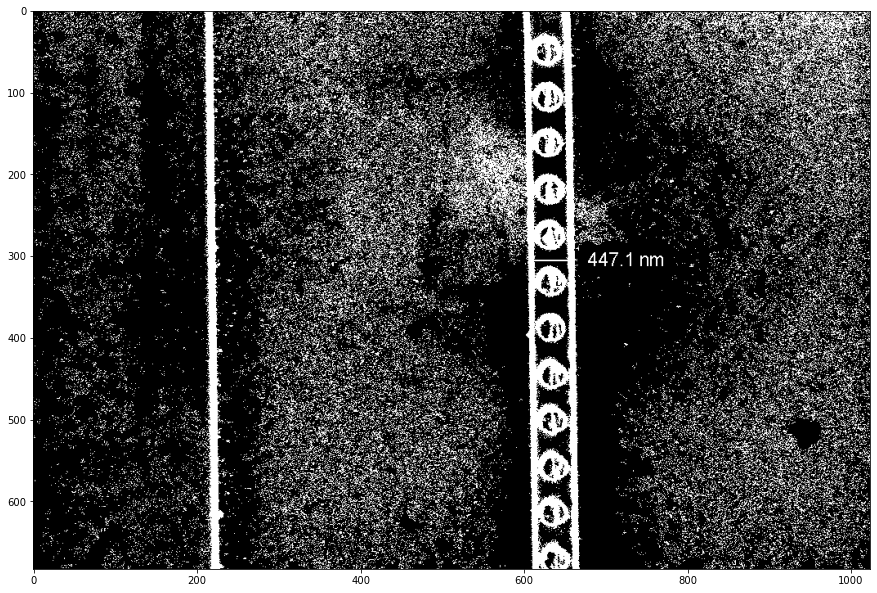

In [10]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(pre, cmap="gray")

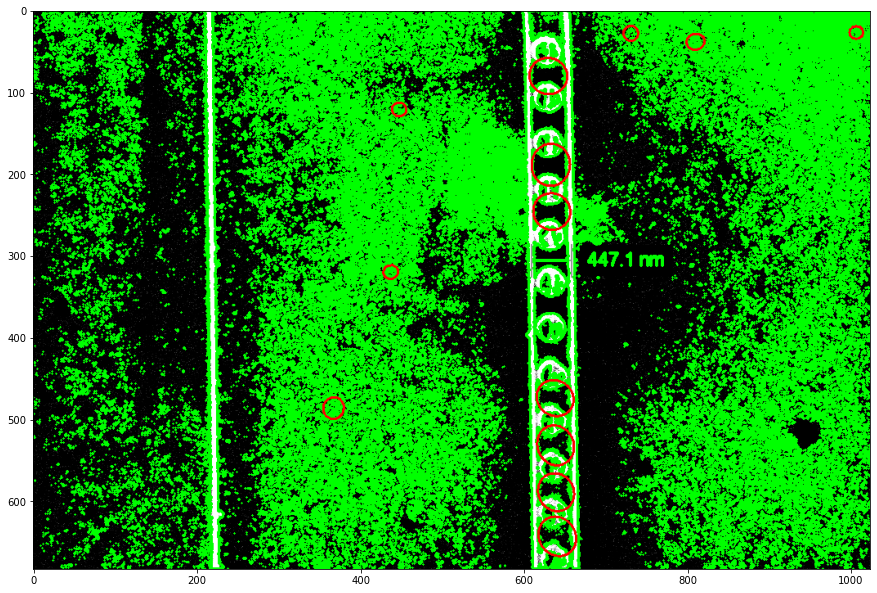

In [11]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(img)

# Image `a90l90-002.tif`
## Basic Algorithm

In [12]:
filename = "../images/a90l90-002/a90l90-002.tif"

def filter_res(res: pd.DataFrame, reset_index=True):
    cond = res["eccentricity"] < 0.3

    # Minimum diameter
    cond &= res["x diameter"] >= 15
    cond &= res["y diameter"] >= 15

    # Maximum diameter
    cond &= res["x diameter"] <= 200
    cond &= res["y diameter"] <= 200

    res = res.query("@cond")
    return res.reset_index(drop=True) if reset_index else res

start = time.time()

# Load image
original = cv2.imread(filename)

# Remove banner
no_banner, loc = remove_banner(original)
save_image(filename, no_banner, "_nobanner")

pre, img, res = Basic(
    no_banner,
    -80,
    invert=False,
    sort="y",
    filter=filter_res,
    # region=(None, 686),
    # show_contours=True,
    # _no_pre = True,
).run()

save_image(filename, pre, "_pre")
save_image(filename, img)
calculate_parameters(filename, res)
save_result(filename, res)

print(f"Time elapsed: {time.time() - start:.2f} seconds")
res

Time elapsed: 0.48 seconds


x center    y center  x diameter  y diameter      angle  eccentricity  \
0  485.606262   77.984390   59.824272   64.083740  52.221153      0.179246   
1  485.245667  176.440659   60.122387   64.444855  63.890892      0.180032   
2  485.480560  277.627502   57.522865   61.994308  50.325989      0.186448   
3  487.393768  378.872589   59.872562   63.191315  32.805786      0.159906   
4  487.106537  382.686005   41.486233   47.405617  88.546242      0.241941   
5  488.921417  482.434418   54.714386   59.700306  58.204926      0.200035   
6  489.196716  581.825012   59.515484   64.580582  65.464256      0.194107   
7  489.238861  585.912537   40.958641   49.923157  87.064476      0.285871   

   x diameter (nm)  y diameter (nm)  perimeter (nm)   area (nm^2)  \
0       304.924315       326.634824      992.343877  78224.793147   
1       306.443806       328.475425      997.629034  79057.597425   
2       293.194044       315.984990      957.231061  72763.147875   
3       305.170451       322.086131      985.471483  77197.704185   
4       211.455328       241.626429      712.488358  40128.502149   
5       278.879225       304.292459      916.478886  66649.552087   
6       303.350421       329.167225      993.970240  78424.375594   
7       208.766193       254.458330      729.402368  41722.154438   

   distance (nm)  
0            NaN  
1     501.834965  
2     515.750733  
3     516.138336  
4      19.492037  
5     508.501809  
6     506.595803  
7      20.835219

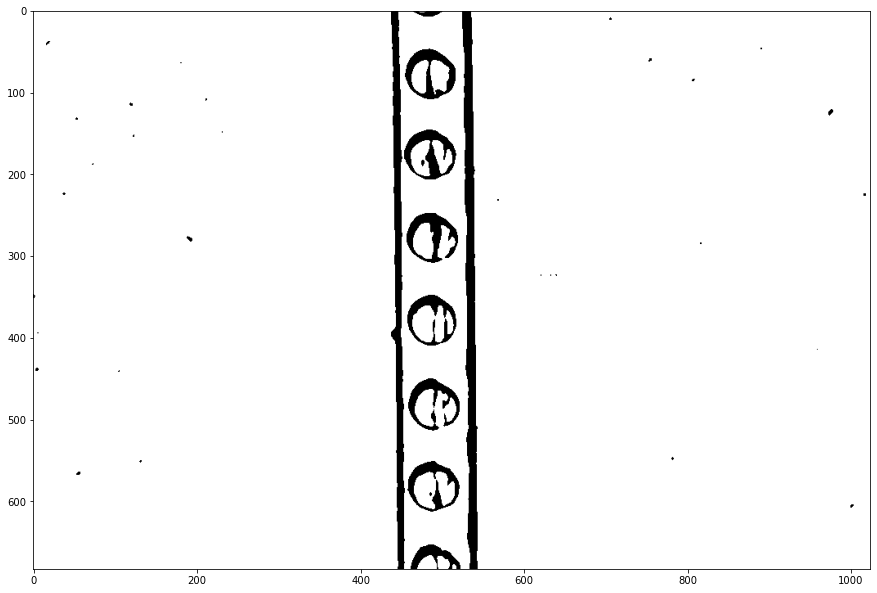

In [13]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(pre, cmap="gray")

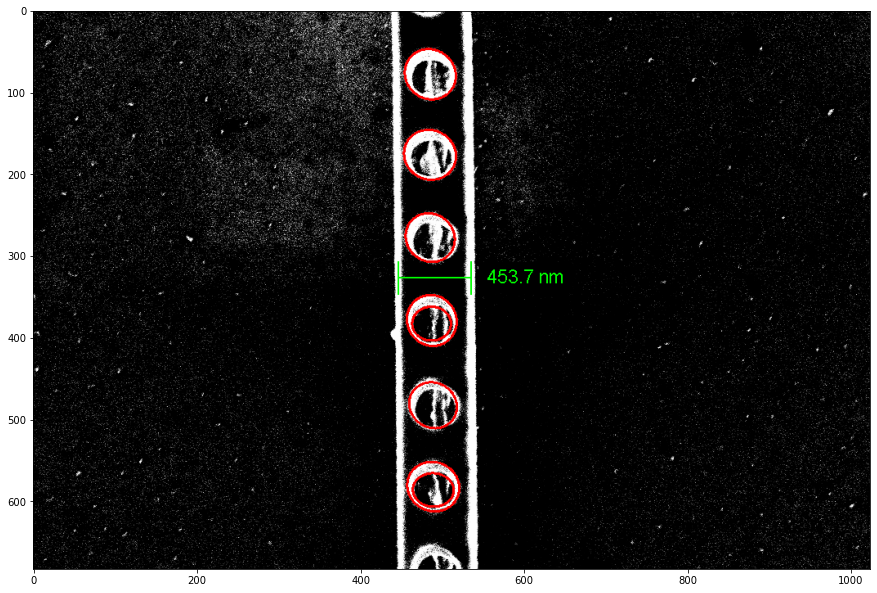

In [14]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(img)

## AAMED Algorithm

In [15]:
filename = "../images/a90l90-002/a90l90-002.tif"

def filter_res(res: pd.DataFrame, reset_index=True):
    cond = res["eccentricity"] < 0.25

    # Minimum diameter
    cond &= res["x diameter"] >= 15
    cond &= res["y diameter"] >= 15

    # Maximum diameter
    cond &= res["x diameter"] <= 200
    cond &= res["y diameter"] <= 200

    res = res.query("@cond")
    return res.reset_index(drop=True) if reset_index else res

start = time.time()

# Load image
original = cv2.imread(filename)

# Remove banner
no_banner, loc = remove_banner(original)
save_image(filename, no_banner, "_nobanner")

# Preprocess
img = cv2.fastNlMeansDenoising(no_banner, None, 10, 7, 21)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=1)

pre, img, res = AAMED(
    img,
    800,
    1200,
    sort="y",
    filter=filter_res,
).run()

save_image(filename, pre, "_pre")
save_image(filename, img)
calculate_parameters(filename, res)
save_result(filename, res)

print(f"Time elapsed: {time.time() - start:.2f} seconds")
res

Time elapsed: 1.11 seconds


x center    y center  x diameter  y diameter      angle   P score  \
0  485.667389   77.932068   59.728340   64.791977  57.282501  0.941150   
1  485.666290  176.872726   60.434460   65.972206  56.469875  0.935952   
2  485.986237  277.316559   58.395897   61.998219  25.761274  0.906001   
3  487.456970  378.705536   59.743301   62.950871  40.245541  0.966492   
4  491.665619  486.008545   47.085648   49.093666 -87.488556  0.817535   
5  489.242950  581.868958   59.399899   64.757492  65.575172  0.939667   
6  490.605621  586.214783   44.704109   49.555492 -89.288696  0.860487   

   eccentricity  x diameter (nm)  y diameter (nm)  perimeter (nm)  \
0      0.193776       304.435364       330.244720      997.365356   
1      0.200521       308.034454       336.260345     1012.541626   
2      0.167952       297.643890       316.004913      964.133057   
3      0.157568       304.511627       320.860596      982.500122   
4      0.141537       239.995544       250.230423      770.129028   
5      0.199137       302.761292       330.068939      994.510254   
6      0.215761       227.856857       252.584351      755.175293   

    area (nm^2)  distance (nm)  
0  78962.500000            NaN  
1  81351.367188     504.300537  
2  73872.140625     511.964844  
3  76737.945312     516.833984  
4  47166.449219     547.343994  
5  78486.484375     488.756561  
6  45202.082031      23.214062

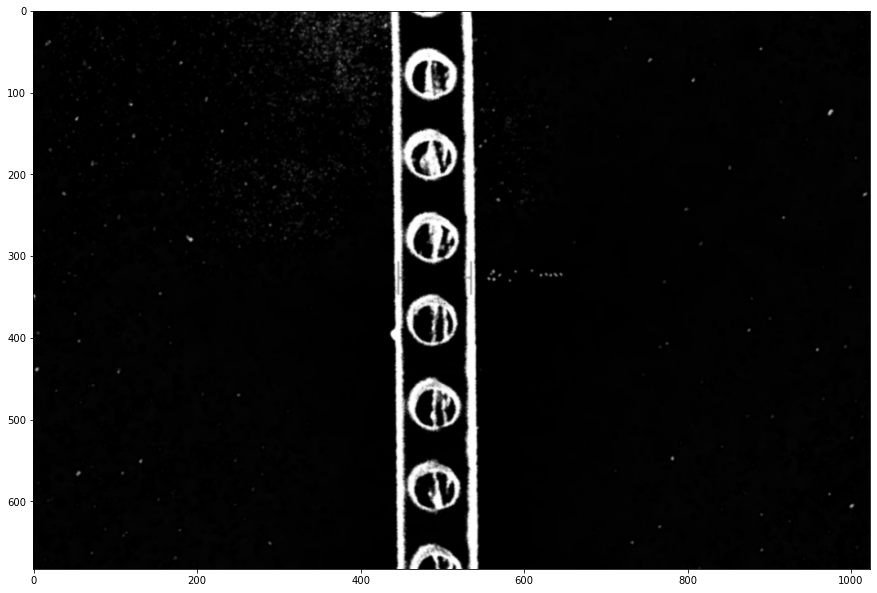

In [16]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(pre, cmap="gray")

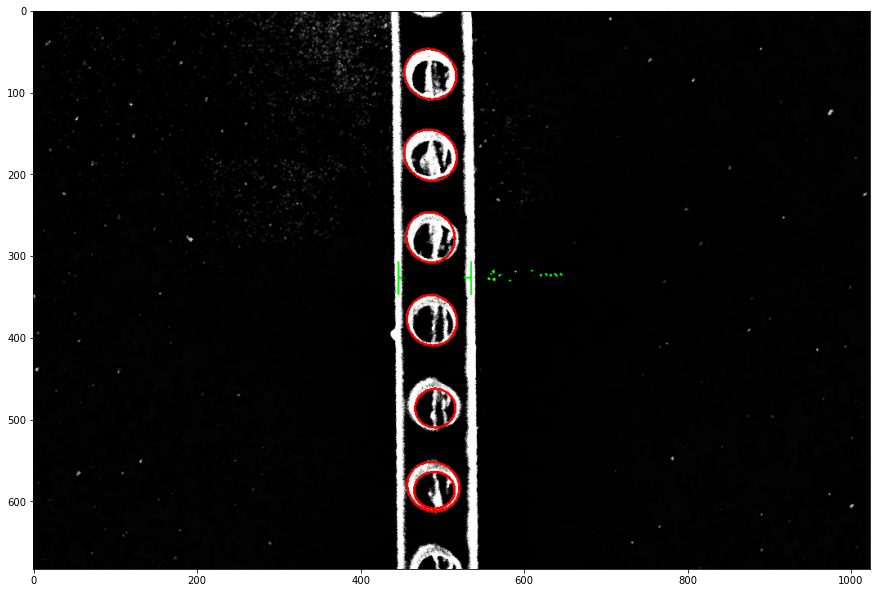

In [17]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(img)

## EM algorithm

In [18]:
filename = "../images/a90l90-002/a90l90-002.tif"

def filter_res(res: pd.DataFrame, reset_index=True):
    cond = res["eccentricity"] < 0.25

    # Minimum diameter
    cond &= res["x diameter"] >= 15
    cond &= res["y diameter"] >= 15

    # Maximum diameter
    cond &= res["x diameter"] <= 200
    cond &= res["y diameter"] <= 200

    res = res.query("@cond")
    return res.reset_index(drop=True) if reset_index else res

start = time.time()

# Load image
original = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)[:, 400:600]

# Remove banner
no_banner, loc = remove_banner(original)
save_image(filename, no_banner, "_nobanner")

# Preprocess
img = cv2.fastNlMeansDenoising(no_banner, None, 10, 7, 21)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=1)

model = EM(
    img,
    n=3,
    invert=False,
    sort="y",
    filter=filter_res,
    show_contours=True,
)
model.train(no_banner)
pre, img, res = model.run()

save_image(filename, pre, "_pre")
save_image(filename, img)
calculate_parameters(filename, res)
save_result(filename, res)

print(f"Time elapsed: {time.time() - start:.2f} seconds")
print(get_pixel_size(filename), "nm/px")
res

Time elapsed: 2.96 seconds
5.097 nm/px


Empty DataFrame
Columns: [x center, y center, x diameter, y diameter, angle, eccentricity, x diameter (nm), y diameter (nm), perimeter (nm), area (nm^2), distance (nm)]
Index: []

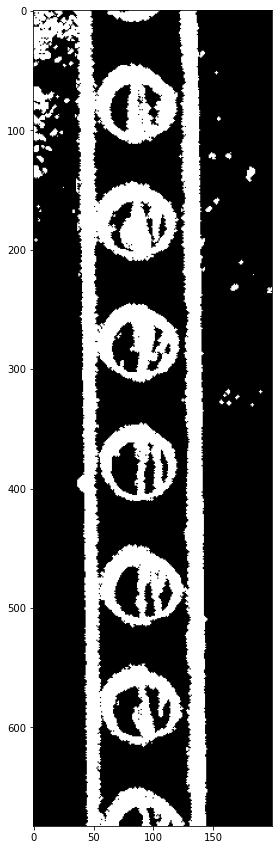

In [19]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(pre, cmap="gray")

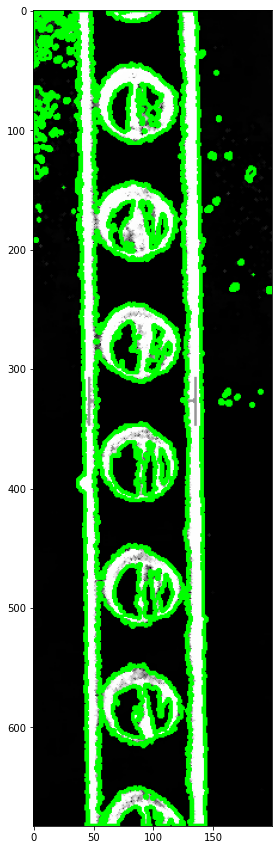

In [20]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(img)

# Image `latest/a90l90__q002.jpg`

## Basic Algorithm

In [21]:
filename = "../images/a90l90__q002/a90l90__q002.jpg"

def filter_res(res: pd.DataFrame, reset_index=True):
    cond = res["eccentricity"] < 0.3

    # Minimum diameter
    # cond &= res["x diameter"] >= 15
    # cond &= res["y diameter"] >= 15

    # Maximum diameter
    # cond &= res["x diameter"] <= 200
    # cond &= res["y diameter"] <= 200

    res = res.query("@cond")
    return res.reset_index(drop=True) if reset_index else res

start = time.time()

# Load image
original = cv2.imread(filename)

# Remove banner
no_banner, loc = remove_banner(original, invert=True)
save_image(filename, no_banner, "_nobanner")

pre, img, res = Basic(
    no_banner,
    -10,
    sort="x",
    filter=filter_res,
    # region=(None, 686),
    # show_contours=True,
    # _no_pre = True,
).run()

save_image(filename, pre, "_pre")
save_image(filename, cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
calculate_parameters(filename, res, ".txt")
save_result(filename, res)

print(f"Time elapsed: {time.time() - start:.2f} seconds")
print(get_pixel_size(filename, ".txt"), "nm/px")
res

Time elapsed: 0.29 seconds
5.669643 nm/px


x center    y center  x diameter  y diameter      angle  eccentricity  \
0    28.923035  231.037949   42.041969   45.288994  62.916893      0.185911   
1   120.046440  232.213150   50.360035   57.416679  89.056351      0.240156   
2   207.572235  234.073959   47.981258   57.076305 -89.186699      0.270789   
3   292.438995  235.822937   38.602650   40.797771  59.502396      0.161798   
4   292.650299  235.172241   53.187241   60.837822 -87.819633      0.242741   
5   372.295502  236.035614   52.729668   59.010487 -87.904671      0.224468   
6   372.367004  235.729279   38.486725   40.387646  85.704704      0.151590   
7   456.781891  236.302658   40.703564   41.904034   7.896927      0.118823   
8   456.796173  236.967041   53.663059   60.667450 -86.718704      0.233228   
9   543.469543  239.169128   39.142277   42.757633  84.074905      0.201221   
10  543.623169  238.343964   55.434582   62.695446 -86.553185      0.233565   

    x diameter (nm)  y diameter (nm)  perimeter (nm)   area (nm^2)  \
0        238.362957       256.772427      778.025659  48070.322026   
1        285.523420       325.532074      960.872697  73000.427483   
2        272.036606       323.602275      937.381254  69139.907696   
3        218.863243       231.308799      707.263713  39760.777202   
4        301.552666       344.928731     1016.633816  81692.544888   
5        298.958391       334.568392      995.927729  78557.117321   
6        218.205990       228.983533      702.545666  39242.873599   
7        230.774675       237.580911      735.730076  43061.541533   
8        304.250388       343.962783     1019.166512  82192.554144   
9        221.922735       242.420516      729.744049  42253.340485   
10       314.294288       355.460797     1053.042709  87744.131571   

    distance (nm)  
0             NaN  
1      516.680142  
2      496.352147  
3      481.266400  
4        3.878858  
5      451.586396  
6        1.783497  
7      478.613311  
8        3.767684  
9      491.565644  
10       4.758779

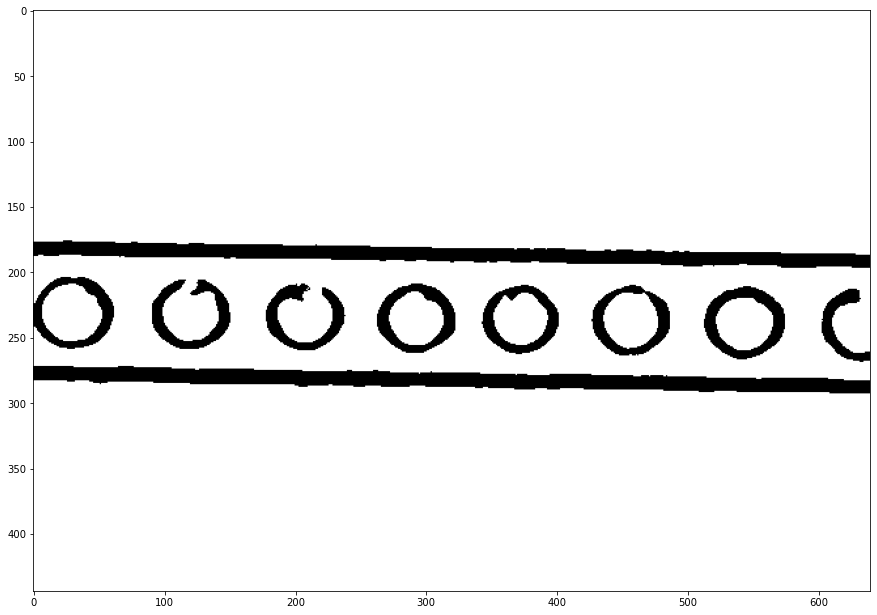

In [22]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(pre, cmap="gray")

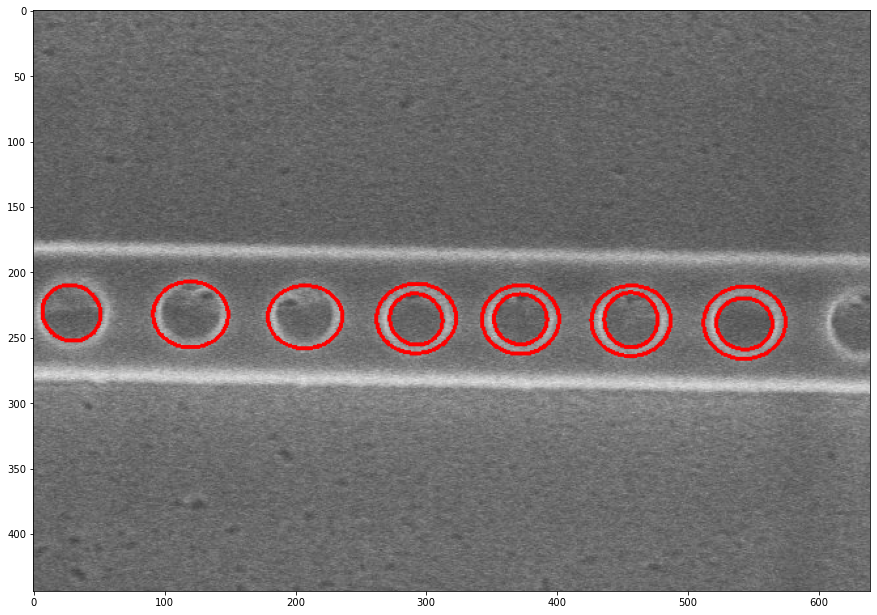

In [23]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(img)

## AAMED Algorithm

Use thresholded image that the Basic Algorithm uses to get better results.

In [24]:
filename = "../images/a90l90__q002/a90l90__q002.jpg"

start = time.time()

# Load image
original = cv2.imread(filename)

# Remove banner
no_banner, loc = remove_banner(original, invert=True)
save_image(filename, no_banner, "_nobanner")

pre, img, res = AAMED(
    pre,
    500,
    700,
    sort="x",
).run()

save_image(filename, pre, "_pre")
calculate_parameters(filename, res, ".txt")
save_result(filename, res)

print(f"Time elapsed: {time.time() - start:.2f} seconds")
print(get_pixel_size(filename, ".txt"), "nm/px")
res

Time elapsed: 0.18 seconds
5.669643 nm/px


x center    y center  x diameter  y diameter      angle   P score  \
0    28.870987  231.091217   42.516266   45.990692  66.757530  0.960953   
1    30.336229  230.839981   55.146275   61.355572 -88.341263  0.922019   
2   119.951889  230.359818   42.432590   44.158161  10.994353  0.786801   
3   120.117760  231.753006   53.613823   60.377514 -88.493813  0.936823   
4   207.537079  233.353027   51.348713   59.847820 -88.339394  0.915984   
5   207.753128  234.191711   37.805908   41.614952 -80.987602  0.825332   
6   290.765106  235.984665   36.758736   39.429882  21.126265  0.822264   
7   292.602661  235.115723   52.052082   59.575687 -88.633568  0.954493   
8   372.166016  236.013351   51.638775   57.798424 -88.722305  0.967287   
9   372.197388  235.321228   39.729679   41.093494  59.391315  0.911612   
10  456.787872  236.869766   52.564518   59.481613 -84.980125  0.955729   
11  456.803162  236.177063   41.104446   42.931080   1.138358  0.944654   
12  543.397827  239.043884   39.905315   43.217957  84.619919  0.954801   
13  543.573730  238.265823   54.251331   61.485828 -87.023567  0.970127   
14  629.281006  242.124939   33.929047   40.894894  37.283058  0.868052   
15  630.667358  240.403641   53.491020   57.477577  55.251141  0.913245   

    eccentricity  x diameter (nm)  y diameter (nm)  perimeter (nm)  \
0       0.190647       241.052048       260.750793      788.533813   
1       0.219181       312.659698       347.864197     1038.285645   
2       0.138408       240.577637       250.361008      771.241150   
3       0.229944       303.971222       342.318939     1016.083984   
4       0.256835       291.128876       339.315765      991.747192   
5       0.208976       214.345993       235.941925      707.717468   
6       0.180900       208.408905       223.553345      678.733215   
7       0.243220       295.116730       337.772888      995.270142   
8       0.224602       292.773407       327.696411      975.403931   
9       0.127745       225.253098       232.985443      719.850586   
10      0.234017       298.022034       337.239502      998.817505   
11      0.144296       233.047531       243.403900      748.496460   
12      0.191979       226.248886       245.030380      740.577637   
13      0.235307       307.585663       348.602692     1031.745361   
14      0.279131       192.365585       231.859451      667.815674   
15      0.182966       303.274994       325.877350      988.589111   

     area (nm^2)  distance (nm)  
0   49365.820312            NaN  
1   85422.351562       8.428634  
2   47305.519531     508.096100  
3   81724.695312       7.954667  
4   77585.257812     495.719330  
5   39720.105469       4.910278  
6   36592.101562     470.758057  
7   78290.398438      11.524404  
8   75351.726562     451.124481  
9   41218.242188       3.928122  
10  78936.289062     479.678223  
11  44551.460938       3.928336  
12  43540.789062     491.229797  
13  84214.468750       4.522658  
14  35030.156250     486.421997  
15  77621.257812      12.530861

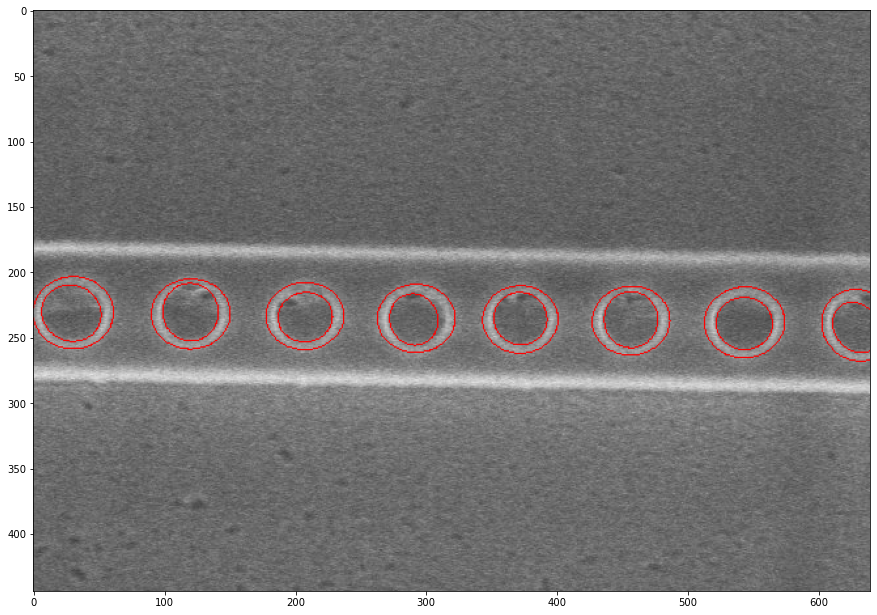

In [25]:
tmp = draw_ellipses(res, no_banner, 1)
save_image(filename, cv2.cvtColor(tmp, cv2.COLOR_RGB2BGR))

fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(tmp)

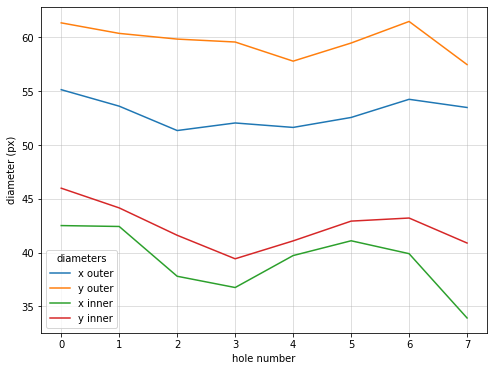

In [27]:
pairs = res.groupby(np.arange(len(res)) // 2)
outer = pairs.max()
inner = pairs.min()

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(outer["x diameter"], label="x outer")
ax.plot(outer["y diameter"], label="y outer")
ax.plot(inner["x diameter"], label="x inner")
ax.plot(inner["y diameter"], label="y inner")
ax.legend(title="diameters")
ax.set_xlabel("hole number")
ax.set_ylabel("diameter (px)")
ax.grid(alpha=0.5)
plt.show()

In [28]:
calculate_parameters(filename, outer, ".txt")
save_result(filename, outer, "_res-outer")

calculate_parameters(filename, inner, ".txt")
save_result(filename, inner, "_res-inner")

## EM Algorithm

Not very good yet, EM algorithm definitely needs to be worked on in a separate project.

Time elapsed: 9.12 seconds


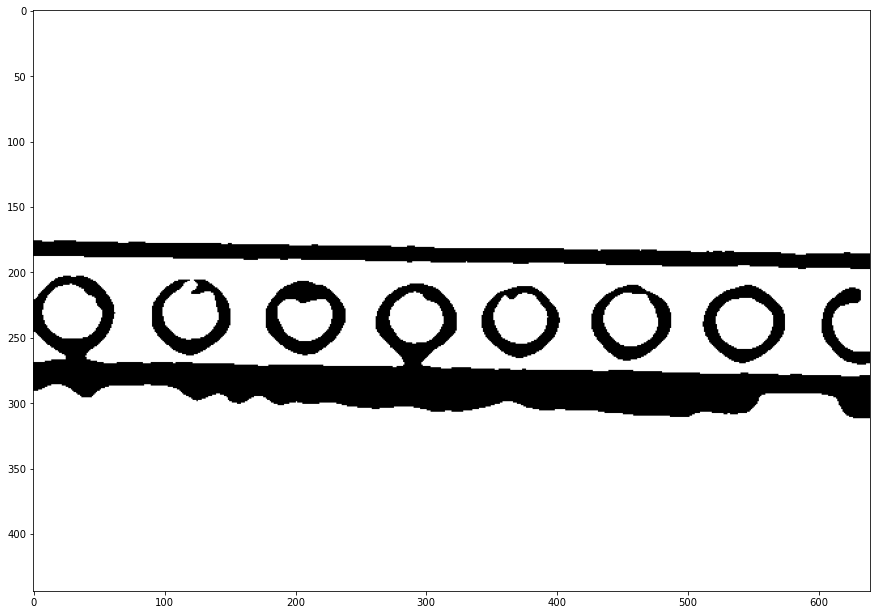

In [29]:
filename = "../images/a90l90__q002/a90l90__q002.jpg"

def filter_res(res: pd.DataFrame, reset_index=True):
    cond = res["eccentricity"] < 0.25

    # Minimum diameter
    cond &= res["x diameter"] >= 15
    cond &= res["y diameter"] >= 15

    # Maximum diameter
    cond &= res["x diameter"] <= 200
    cond &= res["y diameter"] <= 200

    res = res.query("@cond")
    return res.reset_index(drop=True) if reset_index else res

start = time.time()

# Load image
original = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

# Remove banner
no_banner, loc = remove_banner(original, invert=True)
save_image(filename, no_banner, "_nobanner")

# Preprocess
img = cv2.fastNlMeansDenoising(no_banner, None, 10, 7, 21)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=1)

model = EM(
    img,
    n=2,
    invert=False,
    sort="y",
    filter=filter_res,
    show_contours=True,
)
model.train(no_banner, 3)
pre, img, res = model.run()

save_image(filename, pre, "_pre")
save_image(filename, img)
# calculate_parameters(filename, res)
save_result(filename, res)

print(f"Time elapsed: {time.time() - start:.2f} seconds")
# print(get_pixel_size(filename), "nm/px")
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(pre, cmap="gray")

# Image `latest/a90l90__q003.jpg`

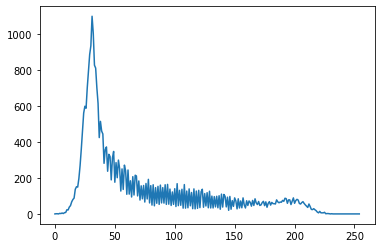

In [30]:
filename = "../images/a90l90__q003/a90l90__q003.jpg"

img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
no_banner = remove_banner(img, invert=True)[0]
no_banner = no_banner[200:250]

# Sigmoid filter
def sigmoid(x, k=1, x0=0):
    return 1 / (1 + np.exp(-k * (x - x0)))

no_banner = no_banner / 255
no_banner = sigmoid(no_banner, k=10, x0=no_banner.mean()) * no_banner
no_banner = (no_banner * 255).astype(np.uint8)
no_banner = cv2.fastNlMeansDenoising(no_banner, None, 10, 7, 21)

save_image(filename, no_banner, "_test")

fig, ax = plt.subplots(figsize=(6, 4))
hist, bins = np.histogram(no_banner.ravel(), 256, [0, 255])
ax.plot(hist[1:])

## Basic Algorithm

In [31]:
def filter_res(res: pd.DataFrame, reset_index=True):
    cond = res["eccentricity"] < 0.3

    # Minimum diameter
    # cond &= res["x diameter"] >= 15
    # cond &= res["y diameter"] >= 15

    # Maximum diameter
    # cond &= res["x diameter"] <= 200
    # cond &= res["y diameter"] <= 200

    res = res.query("@cond")
    return res.reset_index(drop=True) if reset_index else res

start = time.time()

pre, img, res = Basic(
    no_banner,
    -2,
    sort="x",
    filter=filter_res,
    # region=(None, 686),
    # show_contours=True,
    # _no_pre = True,
).run()

save_image(filename, pre, "_pre")
save_image(filename, img)
calculate_parameters(filename, res, ".txt")
save_result(filename, res)

print(f"Time elapsed: {time.time() - start:.2f} seconds")
print(get_pixel_size(filename, ".txt"), "nm/px")
res

Time elapsed: 0.13 seconds
22.04861 nm/px


x center   y center  x diameter  y diameter      angle  eccentricity  \
0  132.814774  23.247490   19.129251   20.235476 -68.369003      0.163054   
1  158.093628  23.632175   16.628048   20.747370   3.040665      0.299029   
2  169.998047  22.756409    5.978340    7.099881  20.634079      0.269712   
3  182.685852  24.138189   17.275923   20.135122  12.761795      0.256825   
4  242.748291  24.577417    7.793808    8.304111  80.742439      0.172574   
5  265.818085  24.751371    6.802308    8.468167  71.814507      0.297801   
6  310.834808  25.469446    6.636292    8.057748  65.890015      0.283592   
7  330.891388  25.306208    6.677030    7.785493  42.895233      0.257138   
8  375.332214  26.782537    8.105183    9.182194 -81.986435      0.234962   

   x diameter (nm)  y diameter (nm)  perimeter (nm)    area (nm^2)  \
0       421.773405       446.164108     1363.622238  147796.348423   
1       366.625344       457.450665     1298.389588  131721.487918   
2       131.814090       156.542500      453.782622   16206.304144   
3       380.910084       443.951459     1297.582212  132815.217719   
4       171.842622       183.094094      557.673364   24711.272446   
5       149.981427       186.711318      530.450396   21993.685452   
6       146.321014       177.662140      510.102847   20416.978469   
7       147.219232       171.659297      501.629088   19848.228847   
8       178.708011       202.454609      599.309953   28415.910180   

   distance (nm)  
0            NaN  
1     557.428134  
2     263.185196  
3     281.402565  
4    1324.328702  
5     508.671344  
6     992.682450  
7     442.234348  
8     980.398975

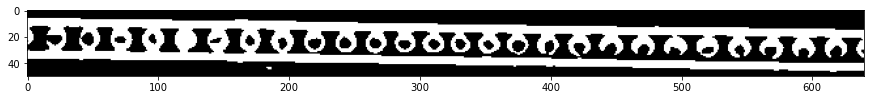

In [32]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(~pre, cmap="gray")

## EM Algorithm

Time elapsed: 2.92 seconds
22.04861 nm/px


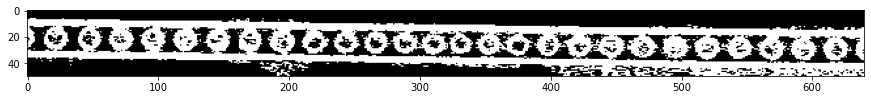

In [33]:
def filter_res(res: pd.DataFrame, reset_index=True):
    cond = res["eccentricity"] < 0.25

    # Minimum diameter
    # cond &= res["x diameter"] >= 15
    # cond &= res["y diameter"] >= 15

    # Maximum diameter
    # cond &= res["x diameter"] <= 200
    # cond &= res["y diameter"] <= 200

    res = res.query("@cond")
    return res.reset_index(drop=True) if reset_index else res

start = time.time()


# Preprocess
# img = cv2.fastNlMeansDenoising(no_banner, None, 10, 7, 21)
# kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
# img = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=1)

model = EM(
    no_banner,
    n=4,
    invert=False,
    sort="x",
    filter=filter_res,
    show_contours=True,
)
model.train(no_banner, 5)
pre, img, res = model.run()

save_image(filename, pre, "_pre")
save_image(filename, img)
calculate_parameters(filename, res, ".txt")
save_result(filename, res)

print(f"Time elapsed: {time.time() - start:.2f} seconds")
print(get_pixel_size(filename, ".txt"), "nm/px")
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(pre, cmap="gray")

In [34]:
tmp = pre

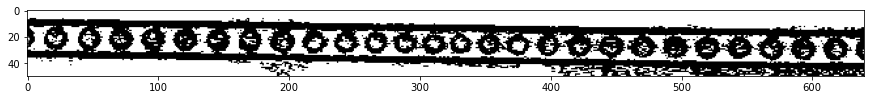

In [35]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(~pre, cmap="gray")

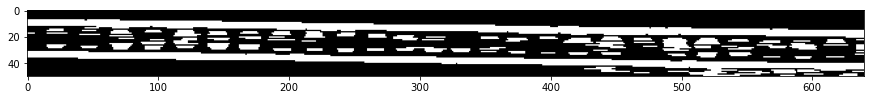

In [36]:
invert = ~pre

linek = np.zeros((11, 11), dtype=np.uint8)
linek[linek.shape[0] // 2, :] = 1
linek

out = cv2.morphologyEx(~invert, cv2.MORPH_OPEN, linek)
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(out, cmap="gray")

## AAMED Algorithm

In [37]:
start = time.time()

pre, img, res = AAMED(
    tmp ^ 1,
    500,
    700,
    sort="x",
).run()

save_image(filename, pre, "_pre")
save_image(filename, img)
calculate_parameters(filename, res, ".txt")
save_result(filename, res)

print(f"Time elapsed: {time.time() - start:.2f} seconds")
print(get_pixel_size(filename, ".txt"), "nm/px")
res

Time elapsed: 0.16 seconds
22.04861 nm/px


Empty DataFrame
Columns: [x center, y center, x diameter, y diameter, angle, P score, eccentricity, x diameter (nm), y diameter (nm), perimeter (nm), area (nm^2), distance (nm)]
Index: []

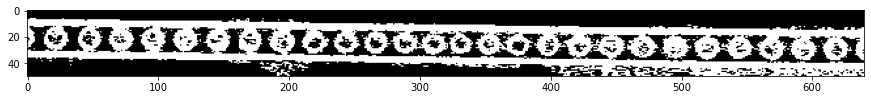

In [38]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(tmp, cmap="gray")

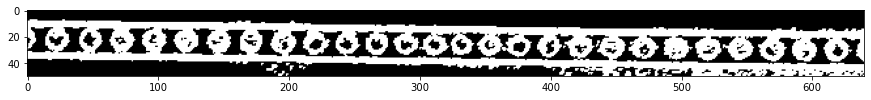

In [39]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2, 2))

fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(cv2.morphologyEx(tmp, cv2.MORPH_OPEN, kernel, iterations=1), cmap="gray")